In [1]:
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam, SGD
from torchsummary import summary
from sklearn import preprocessing

In [2]:
%reset


In [3]:
ID_0630=[25,41,33,52,29,37,25,46,45,33,45,44,39,55]
ID_1674=[48,67,57,91,51,59,69,73,66,66,64,65,67,75]
ID_2961=[67,86,83,94,69,78,86,88,80,81,73,78,86,83]
ID_3564=[85,104,89,106,86,90,100,102,96,95,84,94,92]
ID_3856=[99,114,106,115,104,100,109,108,108,103,93,113,103,93]
ID_6695=[109,118,108,124,118,108,115,114,115,112,100,124,111,101]
ID_6729=[118,124,121,129,126,114,122,123,122,121,106,132,118,107]
ID_7089=[126,130,132,134,132,140,129,130,130,152,113,142,125,113]
ID_7371=[147,150,143,164,143,143,156,138,163,156,119,167,135,121]
ID_7784=[150,161,161,176,168,146,160,156,164,166,125,170,168,131]
ID_7884=[156,163,164,183,176,147,160,157,166,165,145,175,168,145]
ID_8594=[159,167,168,183,183,150,161,162,165,167,147,178,168,148]
ID_9327=[163,168,171,185,182,152,162,166,168,172,148,179,171,153]
ID_9918=[167,164,175,193,183,153,164,169,171,179,149,179,174,157]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
waistDF = pickle.load( open( "waist_final_10272800_new.pkl", "rb" ))
wristDF = pickle.load( open( "wrist_final_10272800_new.pkl", "rb" ))
#otherDF = pickle.load( open( "others.pkl", "rb" ))
wristdrivingDF = pickle.load( open( "wrist_dirving_final_5200000.pkl", "rb" ) )
waistdrivingDF = pickle.load( open( "waist_dirving_final_5200000.pkl", "rb" ) )
wristothersDF = pickle.load( open( "wrist_others_final_5600000.pkl", "rb" ) )
waistothersDF = pickle.load( open( "waist_others_final_5600000.pkl", "rb" ) )


<h3>Dataset class</h3>

In [6]:
'''
from torch.utils import data


class Dataset(data.Dataset):
   
    def __init__(self, X1,X2,Y):
        'Initialization'
        self.X1 = X1
        self.X2 = X2
        self.Y = Y

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X1)
   
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        x1 = self.X1[index]
        x2 = self.X1[index]
        y = self.Y[index]

        return x1,x2,y
        '''

"\nfrom torch.utils import data\n\n\nclass Dataset(data.Dataset):\n   \n    def __init__(self, X1,X2,Y):\n        'Initialization'\n        self.X1 = X1\n        self.X2 = X2\n        self.Y = Y\n\n    def __len__(self):\n        'Denotes the total number of samples'\n        return len(self.X1)\n   \n    def __getitem__(self, index):\n        'Generates one sample of data'\n        # Select sample\n        x1 = self.X1[index]\n        x2 = self.X1[index]\n        y = self.Y[index]\n\n        return x1,x2,y\n        "

In [122]:
from torch.utils import data


class Dataset(data.Dataset):
   
    def __init__(self, X1,X2,Y):
        'Initialization'
        self.X1 = X1
        self.X2 = X2
        self.Y = Y

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X1)
   
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        x1 = self.X1[index]
        x2 = self.X2[index]
        y = self.Y[index]

        return x1,x2,y

<h3>Extracting X train and Y train</h3>

In [123]:
XWrist = wristDF[['x','y','z']]
YWrist = wristDF[['walk']]
XWaist = waistDF[['x','y','z']]
YWaist = waistDF[['walk']]

XWaistDriving = waistdrivingDF[['x','y','z']]
YWaistDriving = waistdrivingDF[['walk']]
XWristDriving = wristdrivingDF[['x','y','z']]
YWristDriving = wristdrivingDF[['walk']]

XWaistothers = waistothersDF[['x','y','z']]
YWaistothers = waistothersDF[['walk']]
XWristothers = wristothersDF[['x','y','z']]
YWristothers = wristothersDF[['walk']]

In [124]:
#XWaistDriving

In [125]:
###preprocessing data -1 to 1 ###
XWrist = preprocessing.normalize(XWrist.values)
#YWrist = wristDF[['walk']]
XWaist = preprocessing.normalize(XWaist.values)
#YWaist = waistDF[['walk']]

XWaistDriving = preprocessing.normalize(XWaistDriving.values)
#YWaistDriving = waistdrivingDF[['walk']]
XWristDriving = preprocessing.normalize(XWristDriving.values)
#YWristDriving = wristdrivingDF[['walk']]

XWaistothers = preprocessing.normalize(XWaistothers.values)
#YWaistothers = waistothersDF[['walk']]
XWristothers = preprocessing.normalize(XWristothers.values)
#YWristothers = wristothersDF[['walk']]

In [126]:
(XWrist)[57764]

array([-0.79147176,  0.26281696, -0.55181492])

<h3>Reshapping the data</h3>

In [127]:
#X_train = XLabel.values.reshape(98918,100,3)
#Y_train = YLabel.values.reshape(98918,100,1)
XWrist_train = XWrist.reshape(102728,100,3)
YWrist_train = np.full((102728,100,1),1)
XWaist_train = XWaist.reshape(102728,100,3)
YWaist_train = np.full((102728,100,1),1)
XWristDriving_train = XWristDriving.reshape(52000,100,3)
YWristDriving_train = np.full((52000,100,1),0)
XWaistDriving_train = XWaistDriving.reshape(52000,100,3)
YWaistDriving_train = np.full((52000,100,1),0)
XWristothers_train = XWristothers.reshape(56000,100,3)
YWristothers_train = np.full((56000,100,1),0)
XWaistothers_train = XWaistothers.reshape(56000,100,3)
YWaistothers_train = np.full((56000,100,1),0)

'''
X_train = XLabel.values.reshape(93063,100,3)
Y_train = YLabel.values.reshape(93063,100,1)
Xd_train = xd.values.reshape(48000,100,3)
Yd_train = yd.values.reshape(48000,100,1)
XOther_train = otherDF
YOther_train = np.full((48000,100,1),0)
#Y_train = max(z) for z in Y_train
'''

'\nX_train = XLabel.values.reshape(93063,100,3)\nY_train = YLabel.values.reshape(93063,100,1)\nXd_train = xd.values.reshape(48000,100,3)\nYd_train = yd.values.reshape(48000,100,1)\nXOther_train = otherDF\nYOther_train = np.full((48000,100,1),0)\n#Y_train = max(z) for z in Y_train\n'

In [128]:
#XWrist_train[50]

In [129]:
XWaistothers_train.shape

(56000, 100, 3)

In [130]:
YWrist_train.shape

(102728, 100, 1)

In [131]:
X_train_waist = np.concatenate([XWrist_train,XWristDriving_train,XWristothers_train])
Y_train_waist = np.concatenate([YWrist_train,YWristDriving_train,YWristothers_train])
X_train_wrist = np.concatenate([XWaist_train,XWaistDriving_train,XWaistothers_train])
Y_train_wrist = np.concatenate([YWaist_train,YWaistDriving_train,YWaistothers_train])

In [132]:
X_train_waist.shape

(210728, 100, 3)

In [133]:
Y_train_waist.shape

(210728, 100, 1)

In [134]:
X_train_wrist.shape

(210728, 100, 3)

In [135]:
Y_train_wrist.shape

(210728, 100, 1)

In [136]:
len(X_train_waist)

210728

In [137]:
len(X_train_wrist)

210728

In [138]:
len(Y_train_waist)

210728

In [139]:
len(Y_train_wrist)

210728

In [140]:
X_train_combine=[]

In [141]:
for i in range (len(X_train_waist)):
    temp = []
    temp.append(X_train_waist[i])
    temp.append(X_train_wrist[i])
    X_train_combine.append(temp)

In [142]:
len(X_train_combine)

210728

In [143]:
X_train_combine = np.array(X_train_combine)

In [144]:
Y_train_combine=[]

In [145]:
for i in range (len(Y_train_waist)):
    temp = []
    temp.append(Y_train_waist[i])
    temp.append(Y_train_wrist[i])
    Y_train_combine.append(temp)

In [146]:
len(Y_train_combine)

210728

In [147]:
Y_train_combine = np.array(Y_train_combine)

In [148]:
print(X_train_waist.shape)
print(Y_train_waist.shape)
print(Y_train_combine.shape)

(210728, 100, 3)
(210728, 100, 1)
(210728, 2, 100, 1)


<h3>Training, validation and test split</h3>

In [149]:
#waist_train_x, waist_val_x, waist_train_y, waist_val_y = train_test_split(X_train_waist, Y_train_waist, test_size = 0.2,train_size=0.8)
#print(waist_val_x.shape,waist_val_y.shape)
#waist_test_x, waist_val_x, waist_test_y, waist_val_y = train_test_split(waist_val_x, waist_val_y, test_size = 0.5,train_size=0.5)

In [150]:
#print(waist_train_x.shape,waist_train_y.shape)
#print(waist_val_x.shape,waist_val_y.shape)
#print(waist_test_x.shape,waist_test_y.shape)

In [151]:
combine_train_x, combine_val_x, combine_y, combine_val_y = train_test_split(X_train_combine, Y_train_combine, test_size = 0.3,train_size=0.7)
print(combine_val_x.shape,combine_val_y.shape)
combine_test_x, combine_val_x, combine_test_y, combine_val_y = train_test_split(combine_val_x, combine_val_y, test_size = 2/3,train_size=1/3)

(63219, 2, 100, 3) (63219, 2, 100, 1)


In [152]:
print(combine_train_x.shape,combine_y.shape)
print(combine_val_x.shape,combine_val_y.shape)
print(combine_test_x.shape,combine_test_y.shape)

(147509, 2, 100, 3) (147509, 2, 100, 1)
(42146, 2, 100, 3) (42146, 2, 100, 1)
(21073, 2, 100, 3) (21073, 2, 100, 1)


In [153]:
waist_train_x=[] 
waist_train_y=[]
waist_val_x=[]
waist_val_y=[]
waist_test_x=[]
waist_test_y=[]
wrist_train_x=[] 
wrist_train_y=[]
wrist_val_x=[]
wrist_val_y=[]
wrist_test_x=[]
wrist_test_y=[]

In [154]:
for i in range (len(combine_train_x)):
    #temp = []
    waist_train_x.append(combine_train_x[i][0])
    wrist_train_x.append(combine_train_x[i][1])
    
for i in range (len(combine_y)):
    #temp = []
    waist_train_y.append(combine_y[i][0])
    wrist_train_y.append(combine_y[i][1])
    
    
for i in range (len(combine_val_x)):
    #temp = []
    waist_val_x.append(combine_val_x[i][0])
    wrist_val_x.append(combine_val_x[i][1])
    
for i in range (len(combine_val_y)):
    #temp = []
    waist_val_y.append(combine_val_y[i][0])
    wrist_val_y.append(combine_val_y[i][1])
    
    
for i in range (len(combine_test_x)):
    #temp = []
    waist_test_x.append(combine_test_x[i][0])
    wrist_test_x.append(combine_test_x[i][1])
    
for i in range (len(combine_test_y)):
    #temp = []
    waist_test_y.append(combine_test_y[i][0])
    wrist_test_y.append(combine_test_y[i][1])

In [155]:
len(wrist_val_y)

42146

In [156]:
waist_train_x=np.array(waist_train_x)
waist_train_y=np.array(waist_train_y)
waist_val_x=np.array(waist_val_x)
waist_val_y=np.array(waist_val_y)
waist_test_x=np.array(waist_test_x)
waist_test_y=np.array(waist_test_y)
wrist_train_x=np.array(wrist_train_x)
wrist_train_y=np.array(wrist_train_y)
wrist_val_x=np.array(wrist_val_x)
wrist_val_y=np.array(wrist_val_y)
wrist_test_x=np.array(wrist_test_x)
wrist_test_y=np.array(wrist_test_y)

In [157]:
 #waist_train_y == wrist_train_y

In [158]:
206728*0.1

20672.800000000003

In [159]:
#wrist_train_x, wrist_val_x, wrist_train_y, wrist_val_y = train_test_split(X_train_wrist, Y_train_wrist, test_size = 0.2,train_size=0.8)
#print(waist_val_x.shape,waist_val_y.shape)
#wrist_test_x, wrist_val_x, wrist_test_y, wrist_val_y = train_test_split(wrist_val_x, wrist_val_y, test_size = 0.5,train_size=0.5)

In [160]:
print(waist_train_x.shape,waist_train_y.shape)
print(waist_val_x.shape,waist_val_y.shape)
print(waist_test_x.shape,waist_test_y.shape)

(147509, 100, 3) (147509, 100, 1)
(42146, 100, 3) (42146, 100, 1)
(21073, 100, 3) (21073, 100, 1)


In [161]:
print(wrist_train_x.shape,wrist_train_y.shape)
print(wrist_val_x.shape,wrist_val_y.shape)
print(wrist_test_x.shape,wrist_test_y.shape)

(147509, 100, 3) (147509, 100, 1)
(42146, 100, 3) (42146, 100, 1)
(21073, 100, 3) (21073, 100, 1)


In [162]:
X_trainWaist = waist_train_x.reshape(147509,1,100,3)
Y_trainWaist = waist_train_y.reshape(147509,100)
Y_trainWaist = np.array([max(z) for z in Y_trainWaist])


X_valWaist = waist_val_x.reshape(42146,1,100,3)
Y_valWaist = waist_val_y.reshape(42146,100)
Y_valWaist = np.array([max(z) for z in Y_valWaist])

#X_test = test_x.reshape(97459,1,100,3)
#Y_test = test_y.reshape(97459,100)
X_testWaist = waist_test_x.reshape(21073,1,100,3)
Y_testWaist = waist_test_y.reshape(21073,100)
Y_testWaist = np.array([max(z) for z in Y_testWaist])

In [163]:
print(X_trainWaist.shape,Y_trainWaist.shape)
print(X_valWaist.shape,Y_valWaist.shape)
print(X_testWaist.shape,Y_testWaist.shape)

(147509, 1, 100, 3) (147509,)
(42146, 1, 100, 3) (42146,)
(21073, 1, 100, 3) (21073,)


In [164]:
X_trainWrist = wrist_train_x.reshape(147509,1,100,3)
Y_trainWrist = wrist_train_y.reshape(147509,100)
Y_trainWrist = np.array([max(z) for z in Y_trainWrist])


X_valWrist = wrist_val_x.reshape(42146,1,100,3)
Y_valWrist = wrist_val_y.reshape(42146,100)
Y_valWrist = np.array([max(z) for z in Y_valWrist])

#X_test = test_x.reshape(97459,1,100,3)
#Y_test = test_y.reshape(97459,100)
X_testWrist = waist_test_x.reshape(21073,1,100,3)
Y_testWrist = waist_test_y.reshape(21073,100)
Y_testWrist = np.array([max(z) for z in Y_testWrist])

In [165]:
Y_trainWrist

array([1, 1, 0, ..., 1, 0, 0])

In [166]:
Y_trainWaist

array([1, 1, 0, ..., 1, 0, 0])

In [167]:
print(X_trainWrist.shape,Y_trainWrist.shape)
print(X_valWrist.shape,Y_valWrist.shape)
print(X_testWrist.shape,Y_testWrist.shape)

(147509, 1, 100, 3) (147509,)
(42146, 1, 100, 3) (42146,)
(21073, 1, 100, 3) (21073,)


In [52]:
np.save('splitdata/X_trainWristfinal_combine5', X_trainWrist) 
np.save('splitdata/Y_trainWristfinal_combine5', Y_trainWrist) 
np.save('splitdata/X_valWristfinal_combine5', X_valWrist) 
np.save('splitdata/Y_valWristfinal_combine5', Y_valWrist) 
np.save('splitdata/X_testWristfinal_combine5', X_testWrist) 
np.save('splitdata/Y_testWristfinal_combine5', Y_testWrist) 


np.save('splitdata/X_trainWaistfinal_combine5', X_trainWaist) 
np.save('splitdata/Y_trainWaistfinal_combine5', Y_trainWaist) 
np.save('splitdata/X_valWaistfinal_combine5', X_valWaist) 
np.save('splitdata/Y_valWaistfinal_combine5', Y_valWaist) 
np.save('splitdata/X_testWaistfinal_combine5', X_testWaist) 
np.save('splitdata/Y_testWaistfinal_combine5', Y_testWaist) 



<h3>Tensors</h3>

In [168]:
X_trainWaist = torch.from_numpy(X_trainWaist)
Y_trainWaist = torch.from_numpy(Y_trainWaist)

In [169]:
X_trainWrist = torch.from_numpy(X_trainWrist)
Y_trainWrist = torch.from_numpy(Y_trainWrist)

In [170]:
print(X_trainWaist.shape,X_trainWaist.shape)

torch.Size([147509, 1, 100, 3]) torch.Size([147509, 1, 100, 3])


In [171]:
print(X_trainWrist.shape,X_trainWrist.shape)

torch.Size([147509, 1, 100, 3]) torch.Size([147509, 1, 100, 3])


In [172]:
X_valWaist = torch.from_numpy(X_valWaist)
Y_valWaist = torch.from_numpy(Y_valWaist)

In [173]:
print(X_valWaist.shape,Y_valWaist.shape)

torch.Size([42146, 1, 100, 3]) torch.Size([42146])


In [174]:
X_valWrist = torch.from_numpy(X_valWrist)
Y_valWrist = torch.from_numpy(Y_valWrist)

In [175]:
print(X_valWrist.shape,Y_valWrist.shape)

torch.Size([42146, 1, 100, 3]) torch.Size([42146])


In [176]:
X_testWaist = torch.from_numpy(X_testWaist)
Y_testWaist = torch.from_numpy(Y_testWaist)

In [177]:
print(X_testWaist.shape,Y_testWaist.shape)

torch.Size([21073, 1, 100, 3]) torch.Size([21073])


In [178]:
X_testWrist = torch.from_numpy(X_testWrist)
Y_testWrist = torch.from_numpy(Y_testWrist)

In [179]:
print(X_testWrist.shape,Y_testWrist.shape)

torch.Size([21073, 1, 100, 3]) torch.Size([21073])


In [180]:
print(X_trainWaist.shape)
print(Y_trainWaist.shape)

torch.Size([147509, 1, 100, 3])
torch.Size([147509])


In [181]:
import torch
from torch.utils import data

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Parameters
params = {'batch_size': 64,'num_workers': 6}
#params = {'batch_size': 256,'num_workers': 6}
max_epochs = 10


# Generators
training_setCombine = Dataset(X_trainWaist, X_trainWrist, Y_trainWaist)
training_generatorCombine = data.DataLoader(training_setCombine, **params)


validation_setCombine = Dataset(X_valWaist,X_valWrist, Y_valWaist)
validation_generatorCombine = data.DataLoader(validation_setCombine, **params)

test_set = Dataset(X_testWaist,X_testWrist, Y_testWaist)
testset_generatorCombine = data.DataLoader(test_set, **params)





In [182]:
training_setCombine.__getitem__(8)

(tensor([[[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.2039,  0.9790, -0.0058],
          [ 0.2230,  0.9743, -0.0312],
          [ 0.2543,  0.9665, -0.0361],
          [ 0.2890,  0.9572, -0.0147],
          [ 0.3061,  0.9518,  0.0192],
          [ 0.2975,  0.9537,  0.0444],
          [ 0.2792,  0.9582,  0.0624],
          [ 0.2542,  0.9640,  0.0778],
          [ 0.2345,  0.9687,  0.0808],
          [ 0.2185,  0.9726,  0.0798],
          [ 0.1980,  0.9772,  0.0768],
          [ 0.1798,  0.98

In [183]:
'''
import torch
from torch.utils import data

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Parameters
params = {'batch_size': 64,'num_workers': 6}
max_epochs = 10


# Generators
training_setWaist = Dataset(X_trainWaist, Y_trainWaist)
training_generatorWaist = data.DataLoader(training_setWaist, **params)

validation_setWaist = Dataset(X_valWaist, Y_valWaist)
validation_generatorWaist = data.DataLoader(validation_setWaist, **params)
'''

'\nimport torch\nfrom torch.utils import data\n\n# CUDA for PyTorch\nuse_cuda = torch.cuda.is_available()\ndevice = torch.device("cuda:0" if use_cuda else "cpu")\n\n# Parameters\nparams = {\'batch_size\': 64,\'num_workers\': 6}\nmax_epochs = 10\n\n\n# Generators\ntraining_setWaist = Dataset(X_trainWaist, Y_trainWaist)\ntraining_generatorWaist = data.DataLoader(training_setWaist, **params)\n\nvalidation_setWaist = Dataset(X_valWaist, Y_valWaist)\nvalidation_generatorWaist = data.DataLoader(validation_setWaist, **params)\n'

In [184]:
'''
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Parameters
params = {'batch_size': 64,'num_workers': 6}
max_epochs = 10


# Generators
training_setWrist = Dataset(X_trainWrist, Y_trainWrist)
training_generatorWrist = data.DataLoader(training_setWrist, **params)

validation_setWrist = Dataset(X_valWrist, Y_valWrist)
validation_generatorWrist = data.DataLoader(validation_setWrist, **params)
'''

'\n# CUDA for PyTorch\nuse_cuda = torch.cuda.is_available()\ndevice = torch.device("cuda:0" if use_cuda else "cpu")\n\n# Parameters\nparams = {\'batch_size\': 64,\'num_workers\': 6}\nmax_epochs = 10\n\n\n# Generators\ntraining_setWrist = Dataset(X_trainWrist, Y_trainWrist)\ntraining_generatorWrist = data.DataLoader(training_setWrist, **params)\n\nvalidation_setWrist = Dataset(X_valWrist, Y_valWrist)\nvalidation_generatorWrist = data.DataLoader(validation_setWrist, **params)\n'

<h3>Building model</h3>

In [185]:
class ConvNetWaist(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvNetWaist, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=(3,3), stride=1,padding=1),
            nn.BatchNorm2d(128),
            #nn.Dropout(p=0.5),
            nn.ReLU()
            )
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(p=0.7),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
            nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
        
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.Dropout(p=0.7),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        #self.fc1 = nn.Linear(100*2*4,64)
        #self.fc2 = nn.Linear(64,1)
        #self.fc1 = nn.Linear(100*2*4,64)
        #self.fc2 = nn.Linear(64,2)
       
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        #out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        #out = F.relu(self.fc1(out))
        #out = F.relu(self.fc1(out))
        #out = self.fc2(out)
        return out

In [186]:
class ConvNetWrist(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvNetWrist, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=(3,3), stride=1,padding=1),
            nn.BatchNorm2d(128),
            #nn.Dropout(p=0.5),
            nn.ReLU()
            )
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(p=0.7),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
            nn.MaxPool2d(kernel_size=2, stride=2,padding=1))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.Dropout(p=0.7),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        #self.fc1 = nn.Linear(100*2*4,64)
        #self.fc2 = nn.Linear(64,1)
        #self.fc1 = nn.Linear(100*2*4,64)
        #self.fc2 = nn.Linear(64,2)
       
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        #out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        #out = F.relu(self.fc1(out))
        #out = F.relu(self.fc1(out))
        #out = self.fc2(out)
        return out

In [187]:
class Combine_Waist_Wrist(nn.Module):
    def __init__(self, modelA, modelB):
        super(Combine_Waist_Wrist, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        
        self.fc1 = nn.Linear(100*2*4*2,64)
        #self.fc1 = nn.Linear(100*2*2,64)
        
        self.classifier = nn.Linear(64,1)   ### 2 -> 1 , make labels 1 dimensions: 0 or 1
        #linear layers
        #linear layers
    def forward(self, x1, x2):
        x1 = self.modelA(x1)
        x2 = self.modelB(x2)
        out = torch.cat((x1, x2), dim=1)
        
        out = F.relu(self.fc1(out))
        #out = (self.fc1(out))
        x = self.classifier(out)  # not relu
        #x = F.tanh(out)
        return x

In [188]:
from torch.optim.lr_scheduler import StepLR
modelWaist = ConvNetWaist()
modelWrist = ConvNetWrist()
modelCombine = Combine_Waist_Wrist(modelWaist,modelWrist)
#model=model.Dropout(p=0.2)
criterion = nn.MSELoss()
#optimizerWaist = SGD(modelWaist.parameters(), lr=0.00001)
#optimizerWrist = SGD(modelWrist.parameters(), lr=0.00001)
#optimizerCombine = optimizerWaist +optimizerWrist

params = list(modelWaist.parameters()) + list(modelWrist.parameters())
optimizerCombine = SGD(params, lr=0.00001,weight_decay = 0.005)
#scheduler = StepLR(optimizerCombine, step_size=1, gamma=0.9)
#weight_decay=1e-5

#optimizerCombine = SGD(modelCombine.parameters(), lr=0.001)
#optimizer = SGD(model.parameters(), lr=0.01)
#learning_rate = 0.01


if torch.cuda.is_available():
    #model = nn.DataParallel(model)
    modelWaist = modelWaist.cuda()
    modelWrist = modelWrist.cuda()
    modelCombine = modelCombine.cuda()
    criterion = criterion.cuda()

modelWaist.to(device)
modelWrist.to(device)
modelCombine.to(device)


Combine_Waist_Wrist(
  (modelA): ConvNetWaist(
    (layer1): Sequential(
      (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (layer2): Sequential(
      (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0.7, inplace=False)
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (layer3): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0.7, inplace=False)
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (modelB): ConvNetWrist(
    (layer1):

In [189]:
summary(modelWaist, (1,100, 3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 100, 3]           1,280
       BatchNorm2d-2          [-1, 128, 100, 3]             256
              ReLU-3          [-1, 128, 100, 3]               0
            Conv2d-4           [-1, 64, 100, 3]          73,792
       BatchNorm2d-5           [-1, 64, 100, 3]             128
           Dropout-6           [-1, 64, 100, 3]               0
              ReLU-7           [-1, 64, 100, 3]               0
         MaxPool2d-8            [-1, 64, 51, 2]               0
            Conv2d-9            [-1, 32, 51, 2]          18,464
      BatchNorm2d-10            [-1, 32, 51, 2]              64
          Dropout-11            [-1, 32, 51, 2]               0
             ReLU-12            [-1, 32, 51, 2]               0
        MaxPool2d-13            [-1, 32, 25, 1]               0
Total params: 93,984
Trainable params: 

In [190]:
#summary(modelWrist, (1,100, 3))

In [191]:
#summary(modelCombine, [(1,100, 3),(1,100, 3)])

In [192]:
##### how it will look like with new dataloader

n_epochs = 50
# empty list to store training losses
#train_losses_waist = []
#train_losses_wrist = []
train_losses_combine = []
train_losses_combine_avg = []

# empty list to store validation losses
#val_losses_waist = []
#val_losses_wrist = []
val_losses_combine = []
val_losses_combine_avg = []

def train():
    modelCombine.train()
    tr_loss = 0
    
    #n_epochs = 10
    best_loss=99999999999999
    for epoch in range(n_epochs):
        tr_loss = 0
        val_loss = 0
        temp1=[]
        temp2=[]
        #scheduler.step()
        for local_batch_waist, local_batch_wrist,local_labels in training_generatorCombine:
            local_batch_waist, local_batch_wrist, local_labels = local_batch_waist.to(device), local_batch_wrist.to(device), local_labels.to(device)
            #local_batch_waist, local_labels = local_batch_waist.to(device), local_labels.to(device)
            
            
            optimizerCombine.zero_grad()
            #optimizerWrist.zero_grad()
            output_train = modelCombine(local_batch_waist.float(), local_batch_wrist.float())
            #output_train = modelCombine(local_batch_waist.float())
            loss_train = criterion(output_train, local_labels.unsqueeze(1).float())
            
            #print(local_labels)
            #print(output_train)
            
            
            
            #print(loss_train)

            train_losses_combine.append(loss_train)
            temp1.append(loss_train.item())
            
            loss_train.backward()
            optimizerCombine.step()
            tr_loss = loss_train.item()
            #tr_loss = tr_loss + loss_train.item()
        avg_loss = np.mean(temp1)
        train_losses_combine_avg.append(avg_loss)
        #print(tr_loss)
        print('Epoch : ',epoch+1, '\t', 'loss :', avg_loss)
        #print('Epoch : ',epoch+1, '\t', 'loss :', tr_loss)
        
        
        with torch.set_grad_enabled(False):
            for local_batch_waist, local_batch_wrist, local_labels in validation_generatorCombine:
                #local_batch_waist, local_labels = local_batch_waist.to(device), local_labels.to(device)
                local_batch_waist, local_batch_wrist, local_labels = local_batch_waist.to(device), local_batch_wrist.to(device), local_labels.to(device)
                
                output_val = modelCombine(local_batch_waist.float(),local_batch_wrist.float())
                loss_val = criterion(output_val, local_labels.unsqueeze(1).float())
                val_losses_combine.append(loss_val)
                temp2.append(loss_val.item())
                #val_loss = val_loss + loss_val
            avg_loss = np.mean(temp2)
            if (avg_loss<=best_loss):
                torch.save(modelCombine.state_dict(), "Sixth_Combine_best_epoch50.pt")
                best_loss=avg_loss
                print("best:  ",best_loss)
                # safe the best mode -> lowest validation loss
            val_losses_combine_avg.append(avg_loss)
            print('Epoch : ',epoch+1, '\t', 'loss :', avg_loss)
            
            
    

        
       

In [193]:
train()

Epoch :  1 	 loss : 0.39549188233120064
best:   0.29824045126373017
Epoch :  1 	 loss : 0.29824045126373017
Epoch :  2 	 loss : 0.2540112011086139
best:   0.21429580121056624
Epoch :  2 	 loss : 0.21429580121056624
Epoch :  3 	 loss : 0.19703264511200455
best:   0.17889936571327436
Epoch :  3 	 loss : 0.17889936571327436
Epoch :  4 	 loss : 0.1714165331226109
best:   0.16460744265540417
Epoch :  4 	 loss : 0.16460744265540417
Epoch :  5 	 loss : 0.15852321906746597
best:   0.1533018256649262
Epoch :  5 	 loss : 0.1533018256649262
Epoch :  6 	 loss : 0.14937376787566828
best:   0.14552757215201403
Epoch :  6 	 loss : 0.14552757215201403
Epoch :  7 	 loss : 0.14186500973207572
best:   0.14085205825263344
Epoch :  7 	 loss : 0.14085205825263344
Epoch :  8 	 loss : 0.1391534623865709
best:   0.1364832344113062
Epoch :  8 	 loss : 0.1364832344113062
Epoch :  9 	 loss : 0.1359784685091445
best:   0.13383396039964215
Epoch :  9 	 loss : 0.13383396039964215
Epoch :  10 	 loss : 0.1329254312525

In [79]:
'''
###### we tried this code

n_epochs = 10
# empty list to store training losses
#train_losses_waist = []
#train_losses_wrist = []
train_losses_combine = []

# empty list to store validation losses
#val_losses_waist = []
#val_losses_wrist = []
val_losses_combine = []

modelCombine.train()
tr_loss = 0
optimizerCombine.zero_grad()

for local_batch1, local_labels1 in training_generatorWaist:
    local_batch1, local_labels1 = local_batch1.to(device), local_labels1.to(device)
    
    for local_batch2, local_labels2 in training_generatorWrist:
        local_batch2, local_labels2 = local_batch2.to(device), local_labels2.to(device)
            
        output_train = modelCombine(local_batch1.float(), local_batch2.float())
        loss_train = criterion(output_train, local_labels1)
        
        train_losses_combine.append(loss_train)

        loss_train.backward()
        optimizerCombine.step()
        tr_loss = loss_train.item()  
        
        
        break
        
    break
        
    '''

'\n###### we tried this code\n\nn_epochs = 10\n# empty list to store training losses\n#train_losses_waist = []\n#train_losses_wrist = []\ntrain_losses_combine = []\n\n# empty list to store validation losses\n#val_losses_waist = []\n#val_losses_wrist = []\nval_losses_combine = []\n\nmodelCombine.train()\ntr_loss = 0\noptimizerCombine.zero_grad()\n\nfor local_batch1, local_labels1 in training_generatorWaist:\n    local_batch1, local_labels1 = local_batch1.to(device), local_labels1.to(device)\n    \n    for local_batch2, local_labels2 in training_generatorWrist:\n        local_batch2, local_labels2 = local_batch2.to(device), local_labels2.to(device)\n            \n        output_train = modelCombine(local_batch1.float(), local_batch2.float())\n        loss_train = criterion(output_train, local_labels1)\n        \n        train_losses_combine.append(loss_train)\n\n        loss_train.backward()\n        optimizerCombine.step()\n        tr_loss = loss_train.item()  \n        \n        \n    

In [80]:
'''
n_epochs = 10
# empty list to store training losses
#train_losses_waist = []
#train_losses_wrist = []
train_losses_combine = []

# empty list to store validation losses
#val_losses_waist = []
#val_losses_wrist = []
val_losses_combine = []






def train():
    #model.train()
    #modelWaist.train()
    #modelWrist.train()
    modelCombine.train()
    tr_loss = 0
    #optimizerWrist.zero_grad()
    #optimizerWaist.zero_grad()
    optimizerCombine.zero_grad()
    #x_train, y_train = Variable(X_train), Variable(Y_train)
    #x_val, y_val = Variable(X_val), Variable(Y_val)
    for epoch in range(n_epochs):
        for local_batch, local_labels in training_generatorWaist:
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)
            
            output_train = modelWaist(local_batch.float())
            loss_train = criterion(output_train, local_labels)
            train_losses_waist.append(loss_train)

            loss_train.backward()
            optimizerWaist.step()
            tr_loss = loss_train.item()

        print(tr_loss)
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_train)
        
        
        for local_batch, local_labels in training_generatorWrist:
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)
            
            output_train2 = modelWrist(local_batch.float())
            loss_train2 = criterion(output_train2, local_labels)
            train_losses_wrist.append(loss_train2)

            loss_train2.backward()
            optimizerWrist.step()
            tr_loss = loss_train2.item()

        print(tr_loss)
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_train2)
        
        
        
        
        with torch.set_grad_enabled(False):
            for local_batch, local_labels in validation_generatorWaist:
            # Transfer to GPU
                local_batch, local_labels = local_batch.to(device), local_labels.to(device)
                
                output_val = modelWaist(local_batch.float())
                loss_val = criterion(output_val, local_labels)
                val_losses_waist.append(loss_val)
            print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)
            
            for local_batch, local_labels in validation_generatorWrist:
            # Transfer to GPU
                local_batch, local_labels = local_batch.to(device), local_labels.to(device)
                
                output_val2 = modelWrist(local_batch.float())
                loss_val2 = criterion(output_val2, local_labels)
                val_losses_wrist.append(loss_val2)
            print('Epoch : ',epoch+1, '\t', 'loss :', loss_val2)
            
            
            
            
        #if(epoch==20):
        #    torch.save(model, "10stepdatamodel_epoch20_3layers_2.pt") 
  '''  

'\nn_epochs = 10\n# empty list to store training losses\n#train_losses_waist = []\n#train_losses_wrist = []\ntrain_losses_combine = []\n\n# empty list to store validation losses\n#val_losses_waist = []\n#val_losses_wrist = []\nval_losses_combine = []\n\n\n\n\n\n\ndef train():\n    #model.train()\n    #modelWaist.train()\n    #modelWrist.train()\n    modelCombine.train()\n    tr_loss = 0\n    #optimizerWrist.zero_grad()\n    #optimizerWaist.zero_grad()\n    optimizerCombine.zero_grad()\n    #x_train, y_train = Variable(X_train), Variable(Y_train)\n    #x_val, y_val = Variable(X_val), Variable(Y_val)\n    for epoch in range(n_epochs):\n        for local_batch, local_labels in training_generatorWaist:\n            local_batch, local_labels = local_batch.to(device), local_labels.to(device)\n            \n            output_train = modelWaist(local_batch.float())\n            loss_train = criterion(output_train, local_labels)\n            train_losses_waist.append(loss_train)\n\n           

In [194]:
torch.save(modelWaist.state_dict(), "sixth_Combine_last_epoch50.pt")

<h3>Saving the model</h3>

In [89]:
#torch.save(modelWaist, "1Waist_stepdatamodel_epoch10_.pt")
#torch.save(modelWrist, "1Wrist_stepdatamodel_epoch10_.pt")

In [197]:
#modelCombine.load_state_dict(torch.load("Third_Combine_best_epoch25.pt"))
#modelWrist.eval()

In [91]:
#modelWaist = torch.load("1Waist_stepdatamodel_epoch10_.pt")
#modelWaist.eval()

<h3>Visualization of train and validation loss</h3>

In [82]:
loss1 = open("splitdata/train_losses5_1.pkl", 'wb')
pickle.dump(train_losses_combine, loss1)
loss1.close()
loss2 = open("splitdata/val_losses5_1.pkl", 'wb')
pickle.dump(val_losses_combine, loss2)
loss2.close()

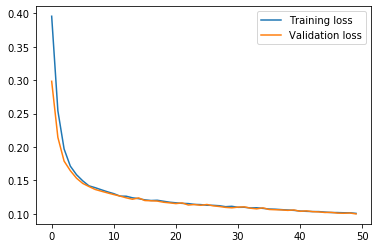

In [195]:
import matplotlib.pyplot as plt
plt.plot(train_losses_combine_avg, label='Training loss')
plt.plot(val_losses_combine_avg, label='Validation loss')
plt.legend()
plt.show()
#plt.savefig('CombineS_waist.png')
#plt.savefig('Combine4.png')

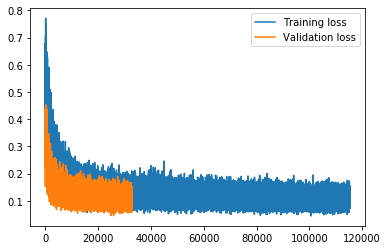

In [196]:
import matplotlib.pyplot as plt
plt.plot(train_losses_combine, label='Training loss')
plt.plot(val_losses_combine, label='Validation loss')
plt.legend()
plt.show()
#plt.savefig('Combines_waist.png')

<h3>Generating training accuracy</h3>

In [85]:

#modelCombine = torch.load("1Combine_step_model_dropout0.8_weightdecay_scheduler_epoch10_last.pt")
#modelCombine.eval()

In [178]:
# prediction for training set
output =[]
with torch.no_grad():
    for local_batch_waist, local_batch_wrist, local_labels in training_generatorCombine:
            #local_batch_waist, local_batch_wrist, local_labels = local_batch_waist.to(device), local_batch_wrist.to(device), local_labels.to(device)
        output.append(modelCombine(local_batch_waist.float().cuda(), local_batch_wrist.float().cuda()))
        
#print(output[0])
        
"""
temp =[]
for x in output:
    softmax = torch.exp(x).cpu()
    prob = list(softmax.numpy())
    temp.extend(prob)
predictions1 = np.argmax(temp, axis=1)
"""

'\ntemp =[]\nfor x in output:\n    softmax = torch.exp(x).cpu()\n    prob = list(softmax.numpy())\n    temp.extend(prob)\npredictions1 = np.argmax(temp, axis=1)\n'

In [179]:
#print(output[200])

In [180]:
#predictions1.tolist()

In [181]:
#Y_train

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_trainWrist, predictions1)

0.5026484139749187

In [86]:
Y_trainWrist

tensor([1, 0, 1,  ..., 1, 0, 0])

<h3>Test set accuracy</h3>

In [86]:
wrist_count = pickle.load( open('wrist_count.pkl',"rb"))
waist_count = pickle.load( open('waist_count.pkl',"rb"))

In [87]:
wrist_count = np.array(wrist_count)
waist_count = np.array(waist_count)


In [332]:
np.array(wrist_count[0]).shape

(240, 100, 3)

In [333]:
#np.array(wrist_count[0]).reshape(240,1,100,3)
#np.array(waist_count[0]).reshape(240,1,100,3)

In [334]:
#X_trainWaist = waist_train_x.reshape(144709,1,100,3)


In [88]:
Ycount_test = np.full((240,100,1),1)
Ycount_test = Ycount_test.reshape(240,100)
Ycount_test = np.array([max(z) for z in Ycount_test])

In [89]:
#Ycount_test

In [90]:
X_countWaist = torch.from_numpy(np.array(wrist_count[15]).reshape(240,1,100,3))
X_countWrist = torch.from_numpy(np.array(waist_count[15]).reshape(240,1,100,3))
Ycount_test = torch.from_numpy(np.array(Ycount_test))

In [405]:
X_countWrist.shape

torch.Size([240, 1, 100, 3])

In [406]:
Ycount_test.shape

torch.Size([240])

In [407]:
#YWaist_train = np.full((102728,100,1),1)

In [91]:
params1 = {'batch_size': 20,'num_workers': 6}

In [92]:
count_test_set = Dataset(X_countWaist,X_countWrist, Ycount_test)
count_testset_generatorCombine = data.DataLoader(count_test_set, **params1)

In [93]:
X_countWaist.shape

torch.Size([240, 1, 100, 3])

In [94]:
#training_setCombine = Dataset(X_trainWaist, X_trainWrist, Y_trainWaist)
#training_generatorCombine = data.DataLoader(training_setCombine, **params)

In [197]:
with torch.no_grad():
    for local_batch_waist, local_labels in testset_generatorCombine:
        print(local_labels)
        break

ValueError: too many values to unpack (expected 2)

In [198]:
# prediction for training set
output =[]
prediction=[]
count=0
with torch.no_grad():
    for local_batch_waist, local_batch_wrist, local_labels in testset_generatorCombine:
        count=count+1
            #local_batch_waist, local_batch_wrist, local_labels = local_batch_waist.to(device), local_batch_wrist.to(device), local_labels.to(device)
        output.append(modelCombine(local_batch_waist.float().cuda(),local_batch_wrist.float().cuda()))
        #output.append(modelWaist(local_batch.float().cuda()))
        prediction.append(local_labels)
        
    print(count)        
"""    
temp =[]
for x in output:
    softmax = torch.exp(x).cpu()
    prob = list(softmax.numpy())
    temp.extend(prob)
predictions3 = np.argmax(temp, axis=1)
"""

330


'    \ntemp =[]\nfor x in output:\n    softmax = torch.exp(x).cpu()\n    prob = list(softmax.numpy())\n    temp.extend(prob)\npredictions3 = np.argmax(temp, axis=1)\n'

In [88]:
output2 = open("splitdata/prediction5_squeeze.pkl", 'wb')
pickle.dump(output, output2)
output2.close()
output2 = open("splitdata/label5_sqiueeze.pkl", 'wb')
pickle.dump(prediction, output2)
output2.close()

In [199]:
TP=0
FP=0
TN=0
FN=0
temp1=[]
temp2=[]
print(len(output))
for i in range(0,(len(output)-1)):
    pred=output[i]
    labelset=prediction[i]
    #print(pred)
    #print(i)
    for j in range(0,64):
        #if(pred[j].item()!=0.5140):
            #print('hello',pred[j].item())
        #print(pred[j])
        #print(labelset)
        #for k in range(0,64):
        temp1.append(pred[j].item())
        temp2.append(labelset[j].item())
        if (pred[j].item()>=0.5) and labelset[j].item()==1:
            TP=TP+1
        elif (pred[j].item()<0.5) and labelset[j].item()==1:
            FN=FN+1
        elif (pred[j].item()<0.5) and labelset[j].item()==0:
            TN=TN+1
        else:
            FP=FP+1
            
print(TP,TN,FP,FN)
    

330
7920 10185 644 2307


In [94]:
output2 = open("splitdata/prediction5.pkl", 'wb')
pickle.dump(temp1, output2)
output2.close()
output2 = open("splitdata/label5.pkl", 'wb')
pickle.dump(temp2, output2)
output2.close()



In [202]:
Precision = (TP/(TP+FP))
Recall = (TP/(TP+FN))
accuracy = (TP+TN)/(TP+FP+TN+FN)
specificity = TN/(TN+FP)

In [204]:
print(Precision)
print(Recall)
print(accuracy)
print(specificity)
print(2*TP/(2*TP+FP+FN))

0.9248014946286782
0.7744206512173658
0.8598499240121581
0.940530058177117
0.8429567346069927
